In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
path = "./csse_covid_19_daily_reports/"
path2 = "./csse_covid_19_time_series/"


In [120]:
df = pd.read_csv(path+'03-22-2020.csv')
df = df.groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head(n=20)
topten = list(df.index)

for i, n in enumerate(topten):
    if 'Korea' in n:
        topten[i]='Korea'
        
# topten.append('Canada')
topten

['Italy',
 'China',
 'Spain',
 'Iran',
 'France',
 'US',
 'United Kingdom',
 'Netherlands',
 'Korea',
 'Switzerland',
 'Germany',
 'Belgium',
 'Indonesia',
 'Japan',
 'Turkey',
 'Brazil',
 'Philippines',
 'Sweden',
 'Canada',
 'Iraq']

death ratio: 0.43808


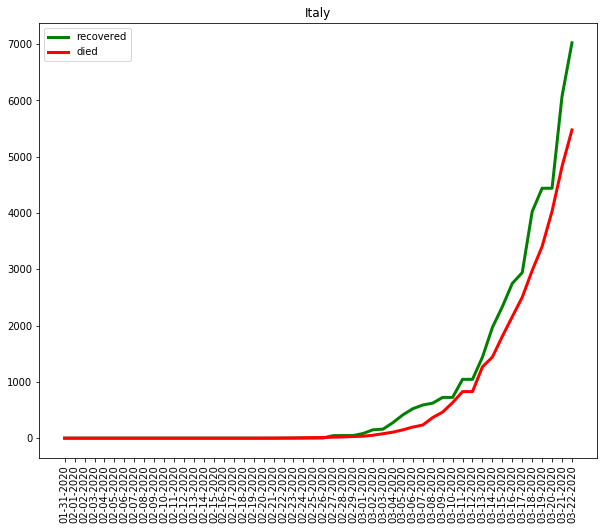

warning, 2 countries detected at 03-11-2020
warning, 2 countries detected at 03-12-2020
death ratio: 0.043172411969270234


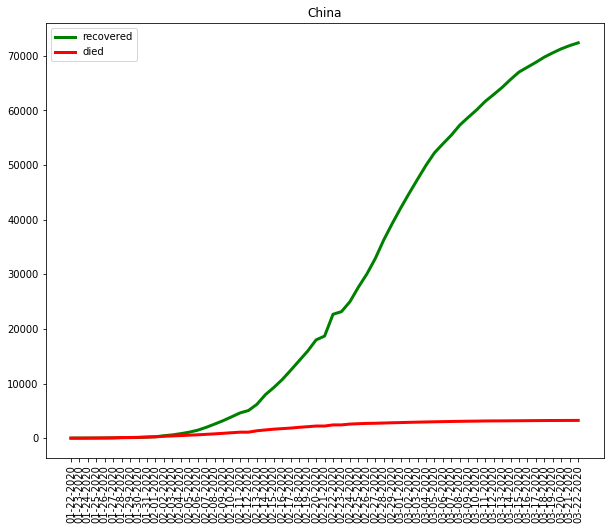

death ratio: 0.407637451115712


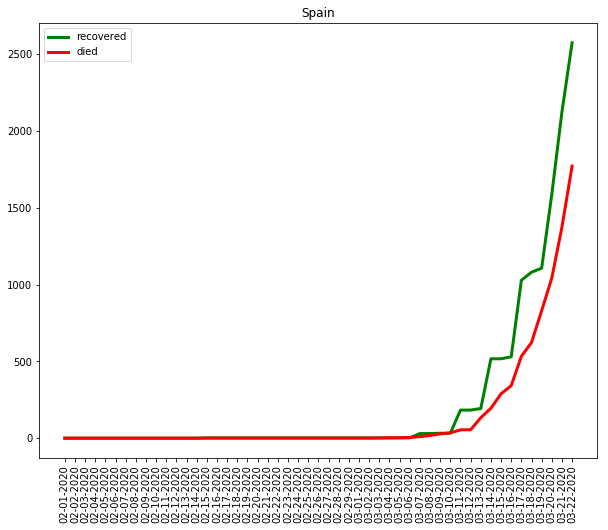

death ratio: 0.17522878535773712


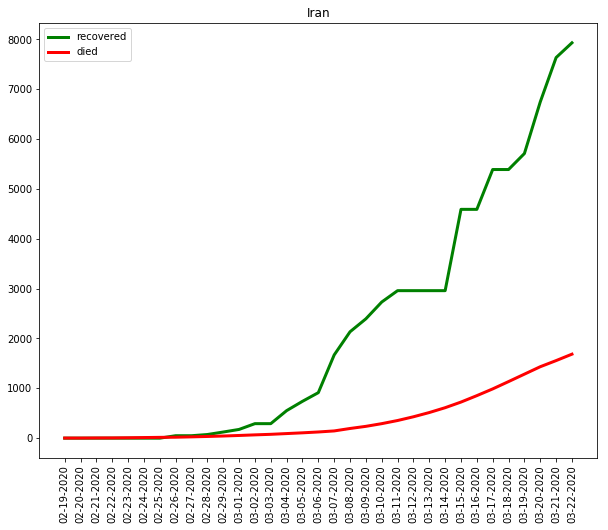

death ratio: 0.23451635351426584


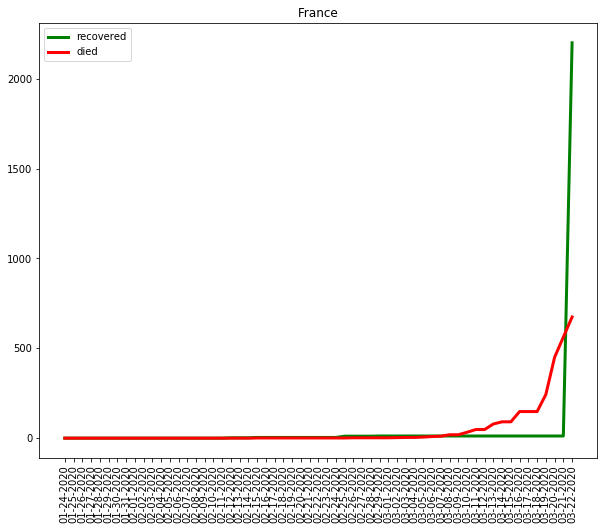

death ratio: 0.7008403361344537


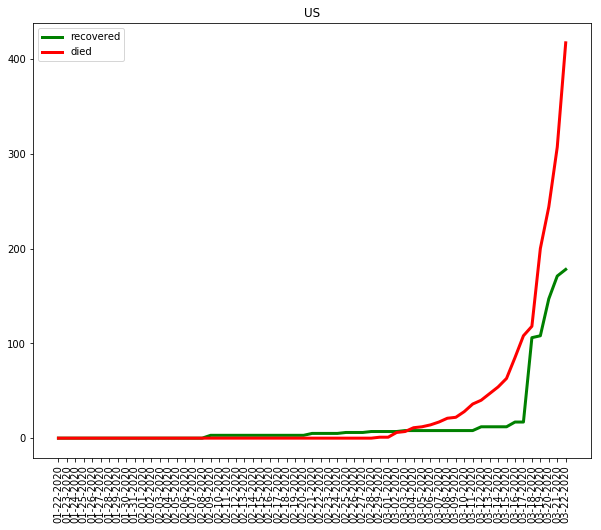

death ratio: 0.8080229226361032


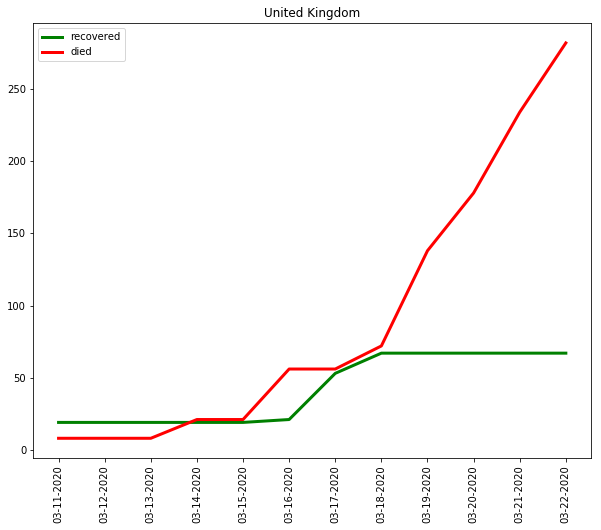

death ratio: 0.989010989010989


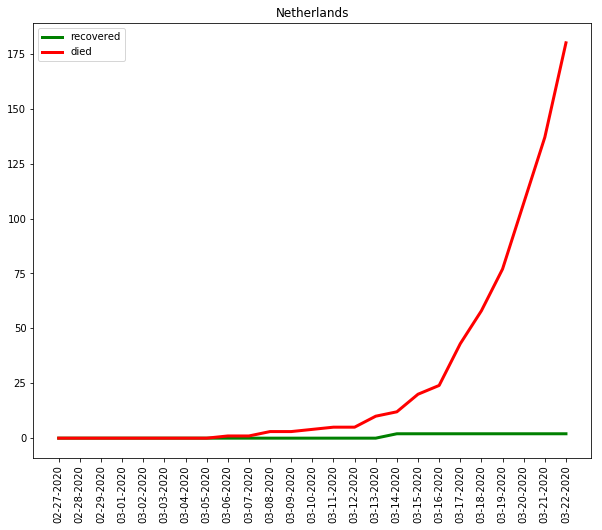

death ratio: 0.0345170925987388


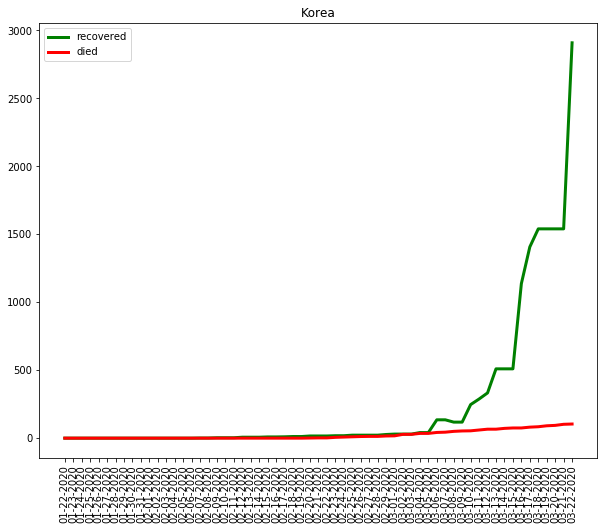

death ratio: 0.4279475982532751


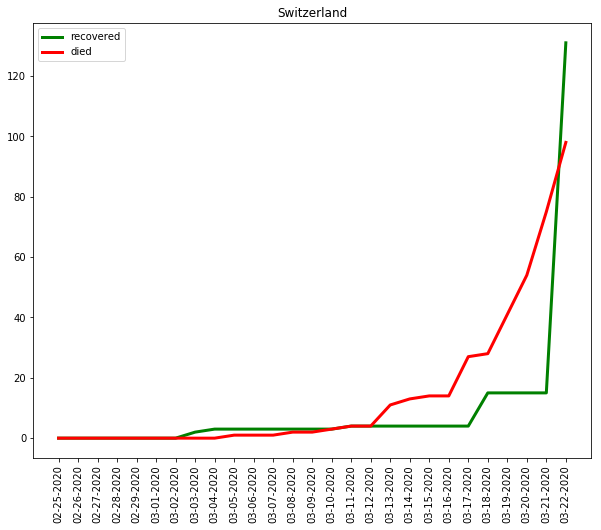

death ratio: 0.2611111111111111


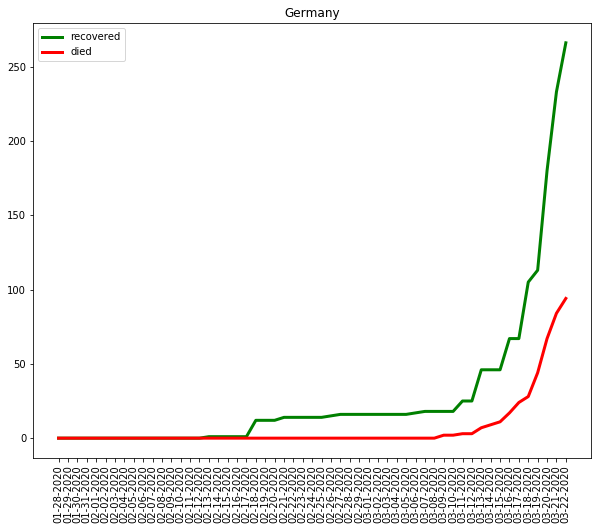

death ratio: 0.22189349112426035


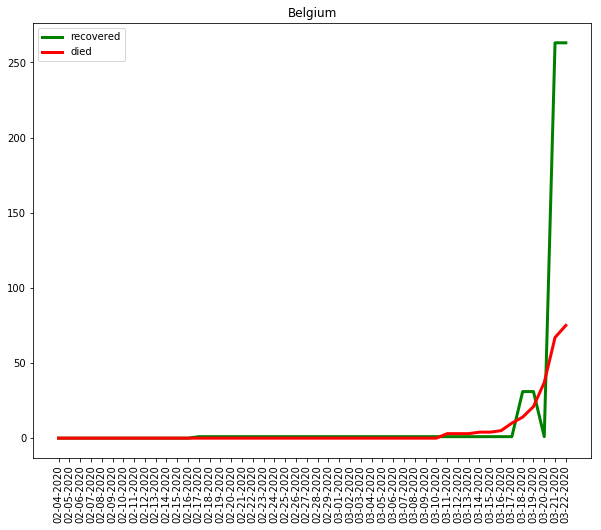

death ratio: 0.6233766233766234


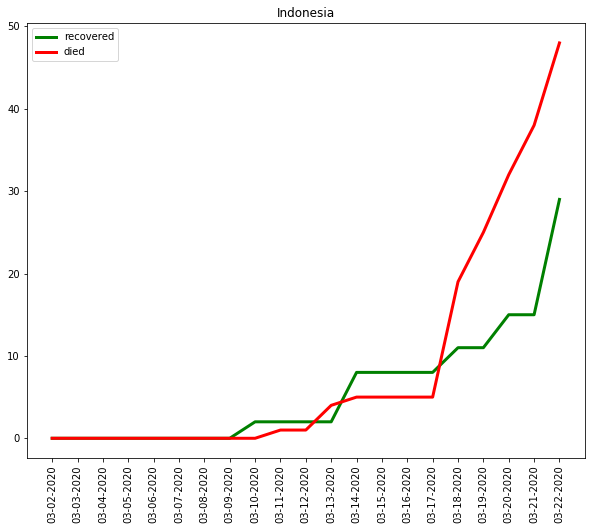

death ratio: 0.14545454545454545


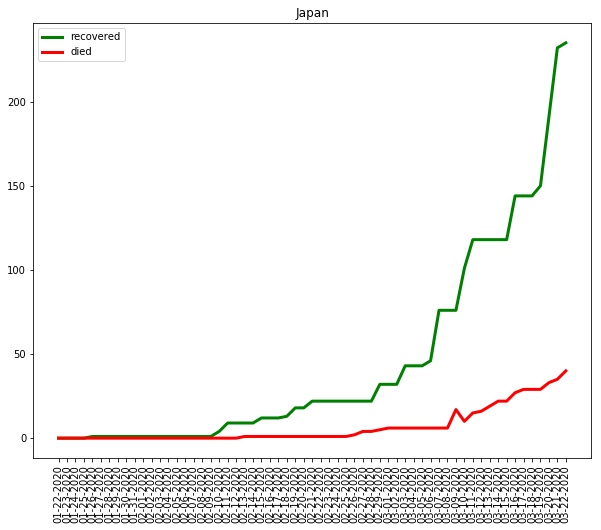

death ratio: 1.0


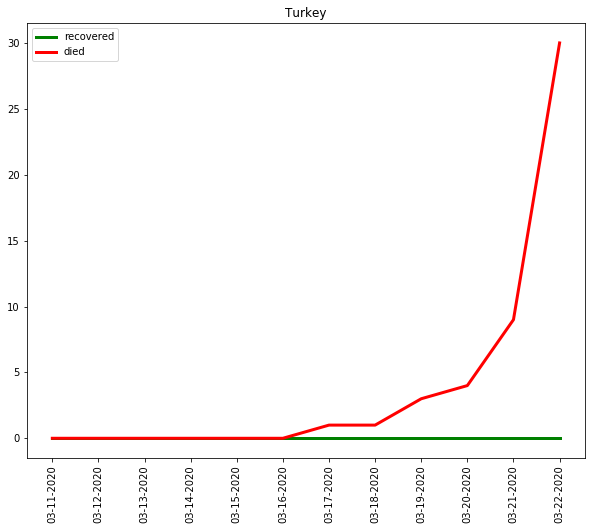

death ratio: 0.9259259259259259


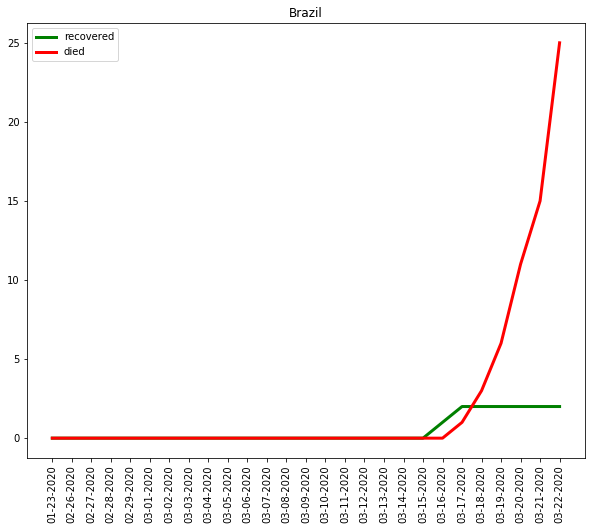

death ratio: 0.5952380952380952


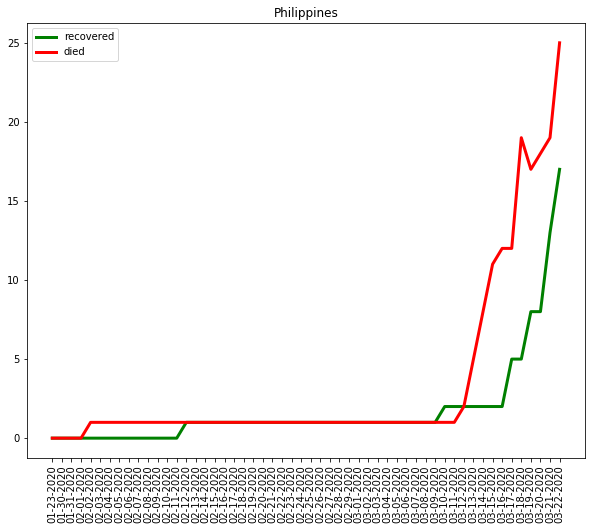

death ratio: 0.5675675675675675


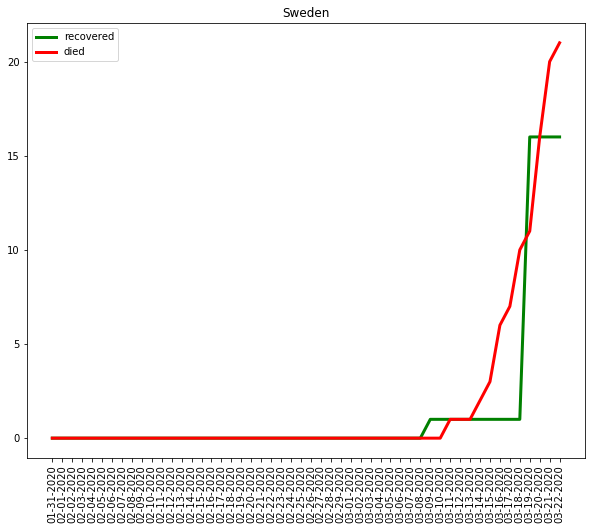

death ratio: 0.6774193548387096


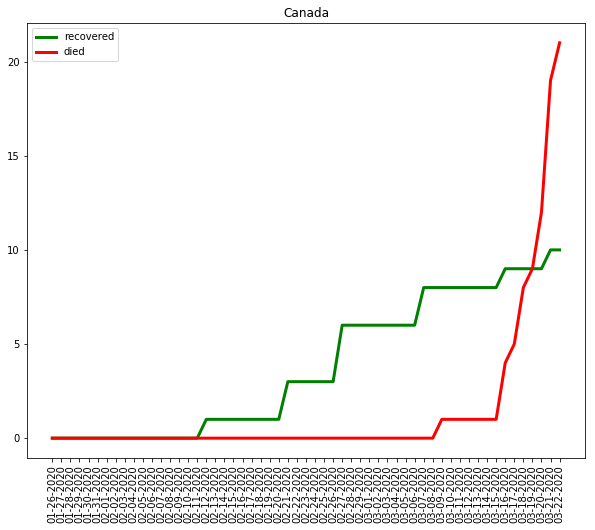

death ratio: 0.2597402597402597


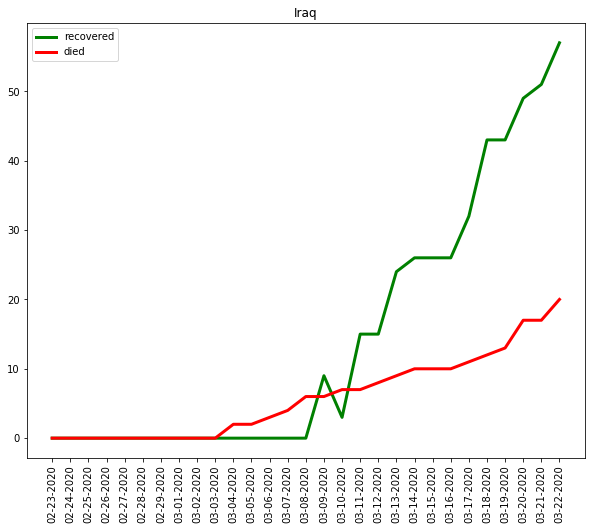

In [158]:
files = glob.glob(path+'*.csv')
death_ratios = pd.DataFrame()
for c in topten:
    country=c
    main_df = pd.DataFrame()
    dates = []
    for f in files:
        df = pd.read_csv(f)
        date = f[-14:-4]

        def country_search(string):
            if country in string:
                return 1
            else:
                return 0

        df[country] = df['Country/Region'].apply(country_search)

        df = df[df[country]==1]

        if len(df)>0:
            dates.append(date)

        df_outcome = df[['Country/Region','Confirmed', 'Deaths','Recovered']]
        df_outcome = df_outcome.groupby('Country/Region').sum()
        if len(df_outcome) > 1:
            print('warning, {0} countries detected at {1}'.format(len(df_outcome), date))
            df_outcome = df_outcome.iloc[0:1]

        df_outcome['Removed'] = df_outcome['Deaths'] + df_outcome['Recovered']
        df_outcome['Infectious'] = df_outcome['Confirmed'] - df_outcome['Removed']
        df_outcome['death_ratio'] = df_outcome['Deaths']/df_outcome['Removed']



        main_df = main_df.append(df_outcome)
    #     main_df = df_outcome.set_index(date)
    #     break

    indexx = pd.Series(dates)
    main_df = main_df.set_index(indexx)

#     death / recovered
    print('death ratio: {}'.format(df_outcome.iloc[-1][-1]))
    row = pd.Series([country, df_outcome.iloc[-1][-1]])
    row_df = pd.DataFrame([row])
    death_ratios = pd.concat([death_ratios, row_df],ignore_index=True)
    
    
    plt.figure(figsize=(10,8))
    width=3
#     plt.plot(main_df['Confirmed'], c='b', label = 'confirmed', linewidth=width)
    plt.plot(main_df['Recovered'], c='g', label = 'recovered', linewidth=width)
    plt.plot(main_df['Deaths'], c='r', label = 'died', linewidth=width)
#     plt.plot(main_df['Infectious'], c='y', label = 'currently infectious', linewidth=width)
    plt.xticks(rotation = 90)
    plt.title(country)
    plt.legend(loc='upper left')
    plt.show()

In [146]:
death_ratios = death_ratios.rename(columns={0:'country', 1:'death_ratio'})

In [23]:
timeser = pd.read_csv(path2 + 'time_series_19-covid-Deaths.csv')
timeser = timeser.groupby('Country/Region').sum()

In [49]:
top20 = timeser.sort_values(timeser.columns[-1], ascending=False).head(n=20)
top20 = top20.index
top20

Index(['Italy', 'China', 'Spain', 'Iran', 'France', 'US', 'United Kingdom',
       'Netherlands', 'Korea, South', 'Switzerland', 'Germany', 'Belgium',
       'Indonesia', 'Japan', 'Turkey', 'Brazil', 'Philippines', 'Sweden',
       'Canada', 'Iraq'],
      dtype='object', name='Country/Region')

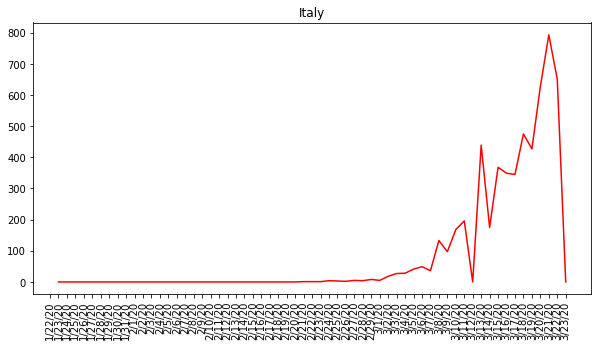

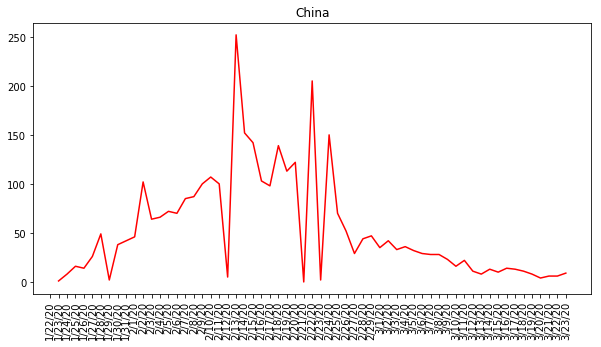

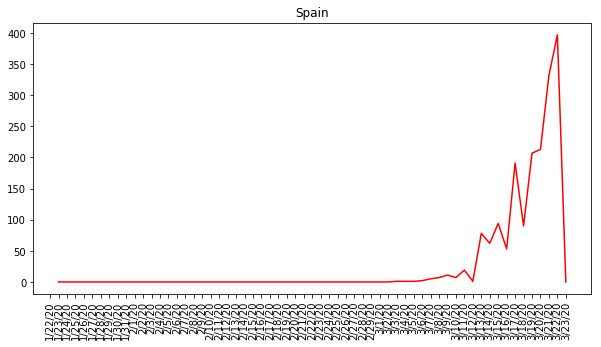

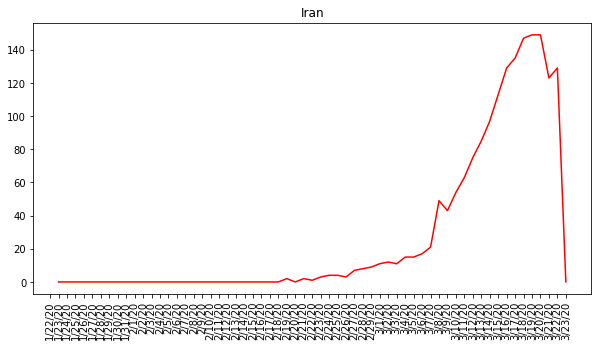

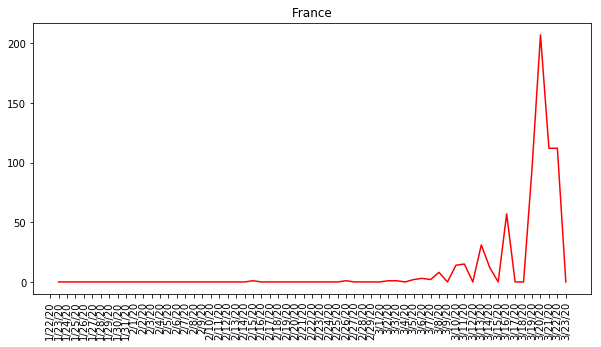

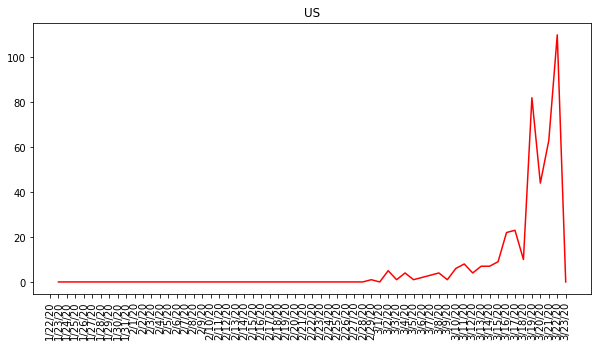

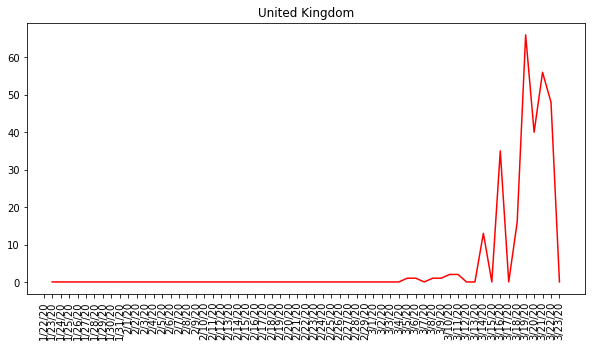

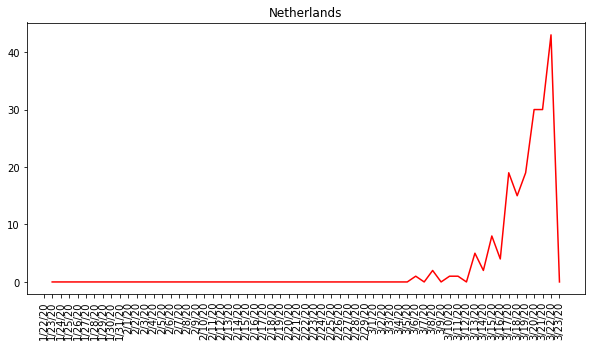

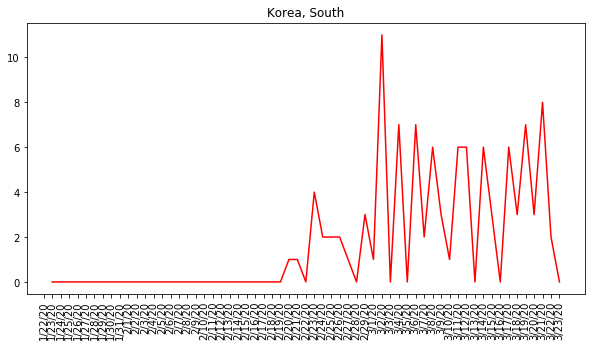

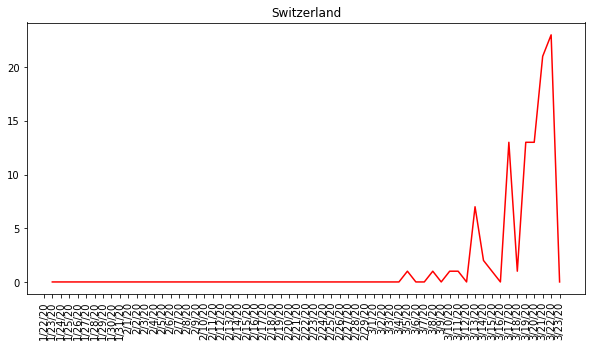

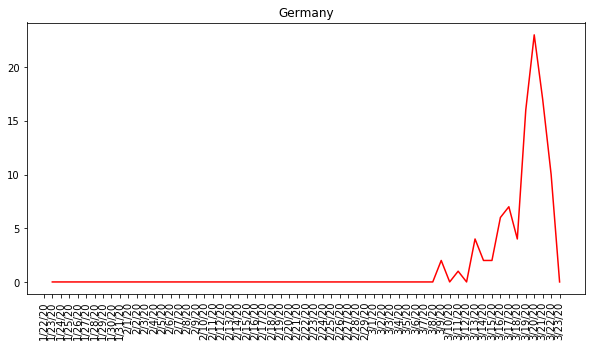

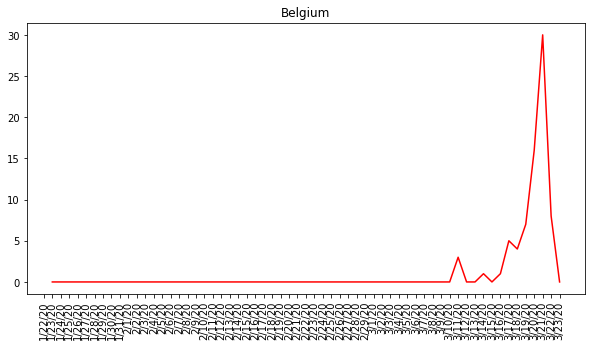

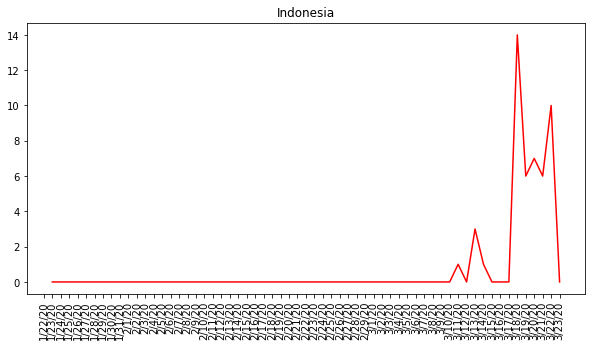

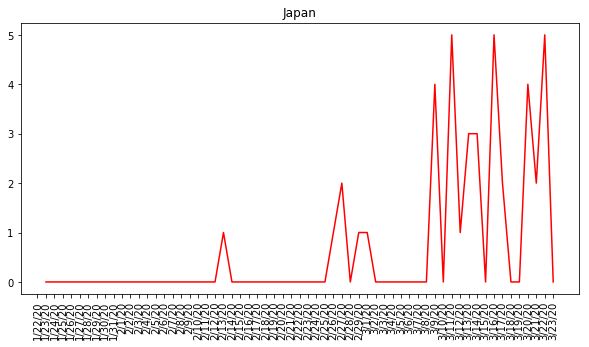

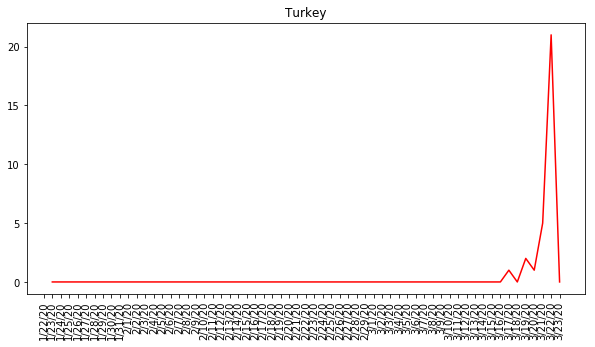

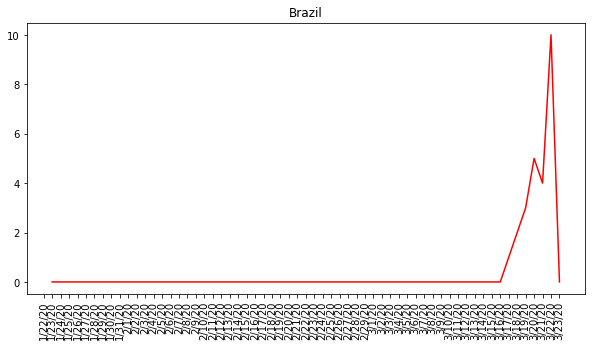

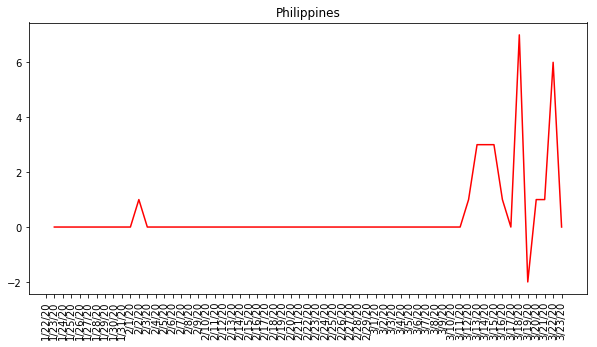

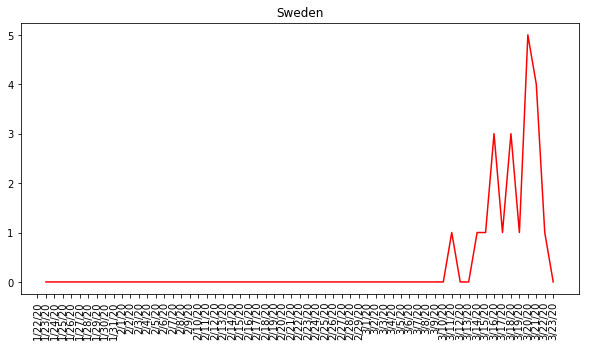

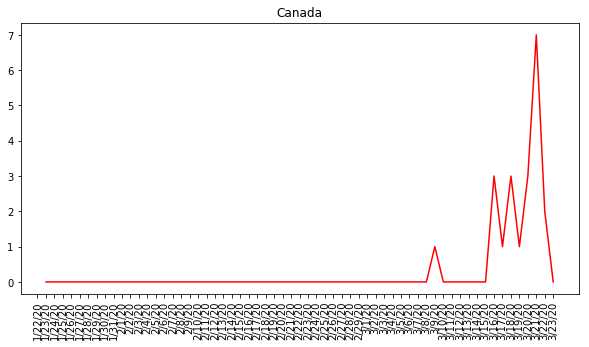

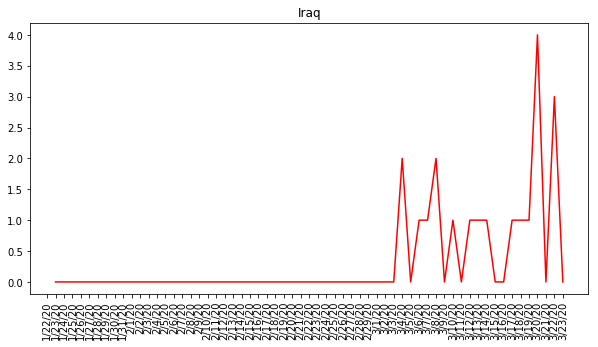

In [50]:
# top20 =['Germany']
for country in top20:
    temp_ = timeser[timeser.index == country]
    temp_ = temp_[temp_.columns[2:]]
    plt.figure(figsize=(10,5))
    plt.plot(temp_.T.diff(), color='r')
    plt.xticks(rotation=90)
    plt.title(country)
#     break

In [147]:
pop_table = pd.read_csv('country_pop_data.csv')

df_20 = pop_table[pop_table['country'].isin(top20)]

df_20['a0-14'] = df_20['population'] * df_20['age 0 to 14']
df_20['a15-64'] = df_20['population'] * df_20['age 15 to 64']
df_20['a65+'] = df_20['population'] * df_20['age over 65']

right = timeser.loc[timeser.index.isin(top20)].iloc[:,-1].reset_index()
m = df_20.merge(right, left_on='country', right_on='Country/Region', how='inner')

m = m.merge(death_ratios, on='country', how='inner')

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [151]:
m

,country,area,population,density,age 0 to 14,age 15 to 64,age over 65,a0-14,a15-64,a65+,Country/Region,3/23/20,death_ratio
0,Belgium,30689.0,1.152445e+07,375.523934,0.171,0.643,0.186,1.970682e+06,7.410224e+06,2.143548e+06,Belgium,75.0,0.022052
1,Brazil,8515767.0,2.112970e+08,24.812444,0.217,0.697,0.086,4.585145e+07,1.472740e+08,1.817154e+07,Brazil,25.0,0.015694
2,Canada,9984670.0,3.796857e+07,3.802686,0.160,0.670,0.170,6.074971e+06,2.543894e+07,6.454656e+06,Canada,21.0,0.014334
3,China,9640821.0,1.401899e+09,145.412873,0.177,0.717,0.106,2.481362e+08,1.005162e+09,1.486013e+08,China,3274.0,0.040112
4,France,543965.0,6.706000e+07,123.279990,0.181,0.622,0.197,1.213786e+07,4.171132e+07,1.321082e+07,France,674.0,0.042009
5,Germany,357168.0,8.314930e+07,232.801651,0.131,0.655,0.215,1.089256e+07,5.446279e+07,1.787710e+07,Germany,94.0,0.003779
6,Indonesia,1904569.0,2.680746e+08,140.753420,0.274,0.673,0.053,7.345244e+07,1.804142e+08,1.420795e+07,Indonesia,48.0,0.093385
7,Iran,1648195.0,8.330651e+07,50.544086,0.237,0.709,0.054,1.974364e+07,5.906432e+07,4.498552e+06,Iran,1685.0,0.077872
8,Iraq,438317.0,3.930978e+07,89.683455,0.404,0.564,0.032,1.588115e+07,2.217072e+07,1.257913e+06,Iraq,20.0,0.085837
9,Italy,301308.0,6.025282e+07,199.970874,0.135,0.635,0.230,8.134131e+06,3.826054e+07,1.385815e+07,Italy,5476.0,0.092597


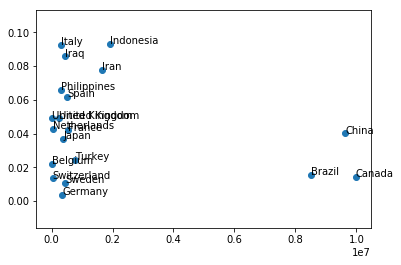

In [155]:
x= m['area']
y= m['death_ratio']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(m['country']):
    ax.annotate(txt, (x[i], y[i]))
plt.show()